In [1]:
# pip install chardet pandas -i https://mirrors.aliyun.com/pypi/simple/

In [2]:
import chardet 
import pandas as pd
# 读取CSV文件
csv_file = '/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/001-乌龟山南.csv'  # 替换为你的CSV文件路径

# 检测文件编码
with open(csv_file, 'rb') as f:
    result = chardet.detect(f.read())  # 读取文件内容，探测编码

print(result['encoding'])
# 使用探测到的编码读取文件
df = pd.read_csv(csv_file, encoding=result['encoding'])

ascii


In [3]:
print(df.columns)

Index(['date', 'temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN',
       'conductivity', 'turbidity', 'chla', 'density'],
      dtype='object')


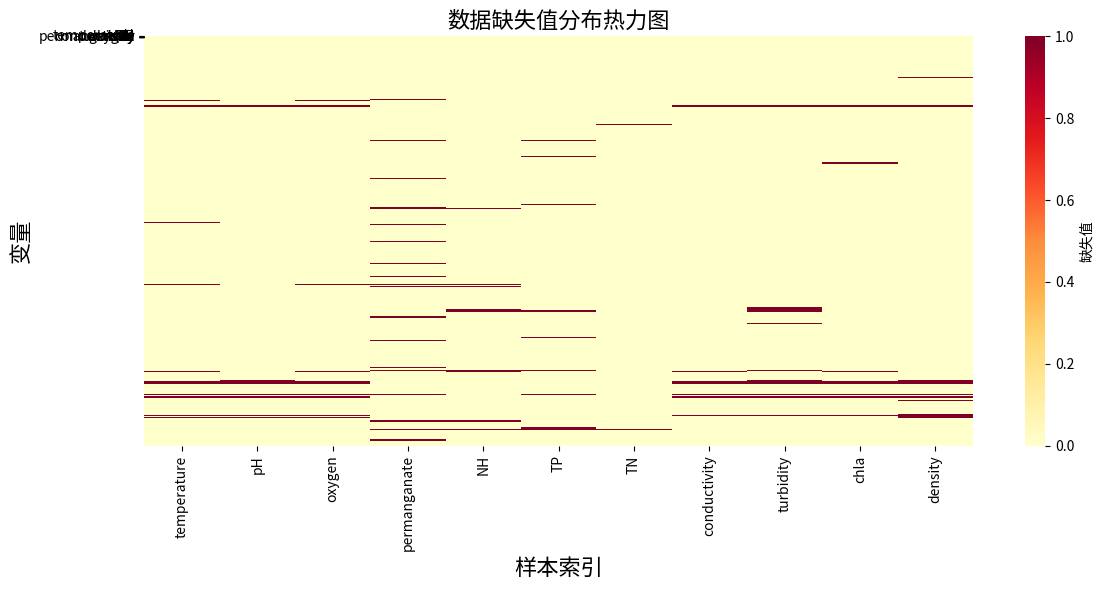

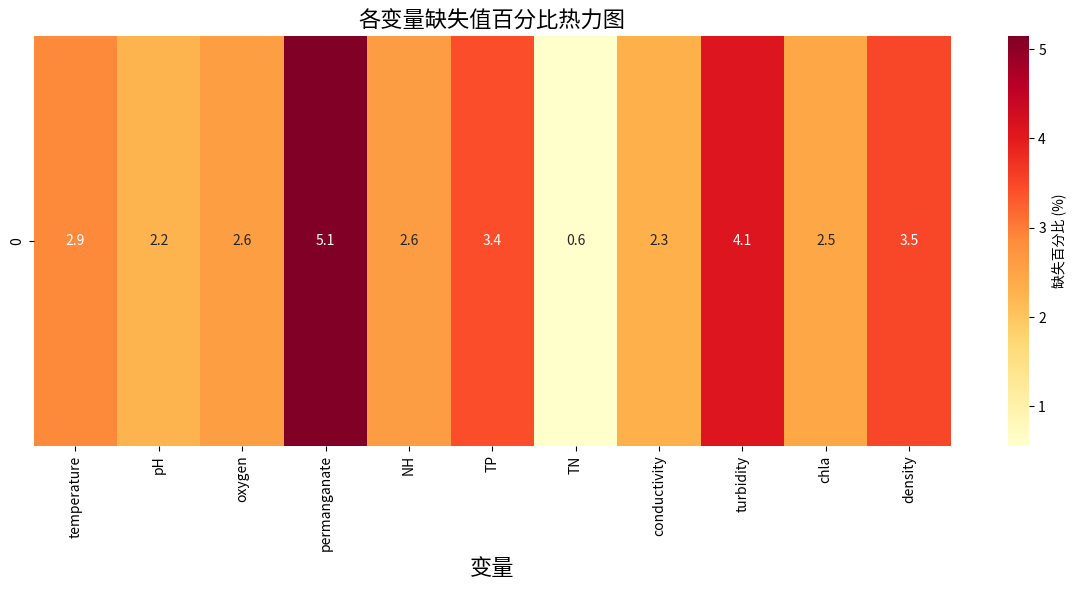

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 设置中英文字体
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK JP', 'DejaVu Sans']
plt.rcParams['font.serif'] = ['DejaVu Serif']
plt.rcParams['axes.unicode_minus'] = False

chinese_font = fm.FontProperties(family='Noto Sans CJK JP', size=16)
english_font = fm.FontProperties(family='DejaVu Serif', size=16)

# 将日期列转换为日期时间格式
df['date'] = pd.to_datetime(df['date'])

# 将除date外的负值替换为nan
columns_to_process = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN',
                     'conductivity', 'turbidity', 'chla', 'density']
for col in columns_to_process:
    df.loc[df[col] < 0, col] = np.nan

# 创建缺失值热力图
plt.figure(figsize=(12, 6))
missing_data = df[columns_to_process].isnull()
sns.heatmap(missing_data, 
            yticklabels=columns_to_process,
            cmap='YlOrRd',
            cbar_kws={'label': '缺失值'})
plt.title('数据缺失值分布热力图', fontproperties=chinese_font)
plt.xlabel('样本索引', fontproperties=chinese_font)
plt.ylabel('变量', fontproperties=chinese_font)
plt.tight_layout()
plt.show()

# 计算每个变量的缺失值百分比并用热力图展示
missing_percentages = df[columns_to_process].isnull().sum() * 100 / len(df)
missing_percentages = pd.DataFrame(missing_percentages).T

plt.figure(figsize=(12, 6))
sns.heatmap(missing_percentages,
            annot=True, 
            fmt='.1f',
            cmap='YlOrRd',
            cbar_kws={'label': '缺失百分比 (%)'})
plt.title('各变量缺失值百分比热力图', fontproperties=chinese_font)
plt.xlabel('变量', fontproperties=chinese_font)
plt.ylabel('')
plt.tight_layout()
plt.show()
